1) load data set (pandas)

1) Label Encoding (pandas)

2) shufle dataset (pandas)

3) split training (70) validation (10) and test (20) %

4) Split inputs and labels (output)

5) label one hot coding

6) fit model without validation (compare training and testing acuracies)

7) fit model wit validation (with history)

8) create graph

9) Introduce k-fold, as data is limited

10) tune nework accuracy by ephoc numbers, change of optimizer,

bath size, hidden layers, number of nueron,

(chapter 3: Listing Listing 3.9, 3:11, 3:17, 3:18 3:19, 3:20)

from tensorflow.keras.utils import to_categorical

from sklearn import preprocessing as pp

enc = pp.LabelEncoder()

sonar_df.iloc[:,60] = enc.fit_transform(sonar_df.iloc[:,60])

df_train=sonar_df.iloc[:144,:60]

df_train_label = sonar_df.iloc[:144, 60]

train_data = df_train.to_numpy()

train_labels = df_train_label.to_numpy()

one_hot_trrain_labels = to_categorical(train_labels)

#short cut

train_data = sonar_df.iloc[:144,:60].values

df.sample(frac=1)

The frac keyword argument specifies the fraction of rows to return in the random sample,

so frac=1 means return all rows (in random order).

In [47]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models

In [48]:
# load dataset
# shuffle dataset
# Split training (70), Validation (10) and Test (20) %
# Split Inputs and Labels (Output)
# One Hot Coding
# Fit Model without validation (Compare Training and Testing Accuracies)
# Fit Model with Validation (with History)
# Create Graph
# Adjust epoch based on graph
# Check Testing and Training accuracies are matched or not
# (Chapter 3: Listing 3:17, 3:18, 3:20
# from tf.keras.utils import to_categorical
# df.sample(frac=1)
# The frac keyword argument specifies the fraction of rows to return in the random sample, so frac=1 means return all rows
# (in random order)

In [49]:
original_dataset = pd.read_csv('sonar.csv', header=None)
practice_dataset = original_dataset[:]
print('Length: ',len(practice_dataset))
print("Shape: ", practice_dataset.shape)

Length:  208
Shape:  (208, 61)


In [50]:
practice_dataset.head(15)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
5,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
6,0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,...,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103,R
7,0.0519,0.0548,0.0842,0.0319,0.1158,0.0922,0.1027,0.0613,0.1465,0.2838,...,0.0081,0.0120,0.0045,0.0121,0.0097,0.0085,0.0047,0.0048,0.0053,R
8,0.0223,0.0375,0.0484,0.0475,0.0647,0.0591,0.0753,0.0098,0.0684,0.1487,...,0.0145,0.0128,0.0145,0.0058,0.0049,0.0065,0.0093,0.0059,0.0022,R
9,0.0164,0.0173,0.0347,0.0070,0.0187,0.0671,0.1056,0.0697,0.0962,0.0251,...,0.0090,0.0223,0.0179,0.0084,0.0068,0.0032,0.0035,0.0056,0.0040,R


In [51]:
arr = np.array(practice_dataset) # Converting dataset to array
np.random.shuffle(arr) # Now shuffling array

In [52]:
train_size = int(len(arr) * 0.7)
print("Train size: %d" % train_size)
validation_size = int((len(arr) - train_size) * 0.10)
print("Validation size: %d" % validation_size)
test_size = int((len(arr) - train_size) - validation_size)
print("Test size: %d" % test_size)
145+6+57

Train size: 145
Validation size: 6
Test size: 57


208

In [53]:
def train_validation_test_split(data, train_size, validation_size):
    train = data[:train_size]
    validation = data[train_size:(train_size+validation_size)]
    test = data[(train_size+validation_size):]
    return train, validation, test

In [54]:
print(train_size)
print(validation_size)
print(test_size)

145
6
57


In [55]:
print(arr[:,:59])
print(arr[:, 59].shape)

[[0.0084 0.0153 0.0291 ... 0.0058 0.0031 0.0072]
 [0.0353 0.0713 0.0326 ... 0.0037 0.0096 0.0093]
 [0.0116 0.0179 0.0449 ... 0.0097 0.0054 0.0148]
 ...
 [0.0114 0.0222 0.0269 ... 0.005 0.0145 0.0103]
 [0.0093 0.0269 0.0217 ... 0.007 0.0116 0.006]
 [0.0036 0.0078 0.0092 ... 0.0018 0.0049 0.0024]]
(208,)


In [56]:
labels = arr[:,60]
print(arr[:,60])

data = arr[:,:60]
print(arr[:,:60])
print(arr[:,:60].shape)

['R' 'R' 'M' 'M' 'M' 'R' 'M' 'R' 'M' 'R' 'M' 'M' 'M' 'R' 'R' 'R' 'R' 'M'
 'M' 'M' 'R' 'M' 'M' 'R' 'M' 'R' 'R' 'M' 'M' 'M' 'R' 'R' 'M' 'M' 'M' 'R'
 'M' 'M' 'M' 'R' 'R' 'M' 'R' 'R' 'M' 'R' 'R' 'M' 'M' 'M' 'R' 'R' 'M' 'M'
 'M' 'R' 'M' 'M' 'R' 'R' 'M' 'M' 'M' 'R' 'R' 'M' 'M' 'R' 'R' 'R' 'R' 'M'
 'M' 'M' 'M' 'R' 'M' 'M' 'M' 'M' 'R' 'M' 'R' 'R' 'M' 'M' 'M' 'R' 'M' 'R'
 'R' 'R' 'R' 'M' 'R' 'R' 'M' 'R' 'R' 'R' 'R' 'M' 'R' 'M' 'R' 'M' 'R' 'M'
 'R' 'R' 'M' 'M' 'M' 'M' 'R' 'R' 'R' 'M' 'M' 'M' 'R' 'M' 'R' 'M' 'M' 'R'
 'M' 'R' 'M' 'R' 'R' 'M' 'M' 'M' 'R' 'R' 'M' 'R' 'M' 'M' 'M' 'R' 'M' 'M'
 'R' 'R' 'M' 'M' 'M' 'M' 'M' 'R' 'M' 'M' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'M' 'R' 'R' 'M' 'M' 'M' 'M' 'M' 'M' 'R' 'M' 'M' 'M' 'R' 'R' 'M' 'R' 'R'
 'M' 'M' 'M' 'R' 'M' 'R' 'R' 'M' 'M' 'R' 'R' 'M' 'M' 'M' 'M' 'M' 'M' 'R'
 'R' 'R' 'M' 'R' 'M' 'R' 'R' 'M' 'R' 'R']
[[0.0084 0.0153 0.0291 ... 0.0031 0.0072 0.0045]
 [0.0353 0.0713 0.0326 ... 0.0096 0.0093 0.0053]
 [0.0116 0.0179 0.0449 ... 0.0054 0.0148 0.0092]
 ...
 [0

In [57]:
train_set, validation_set, test_set = train_validation_test_split(arr[:,:60], train_size, validation_size)
train_label, validation_label, test_label = train_validation_test_split(arr[:,60], train_size, validation_size)
print(train_set.shape)
print(validation_set.shape)
print(test_set.shape)

print(train_label.shape)
print(validation_label.shape)
print(test_label.shape)

(145, 60)
(6, 60)
(57, 60)
(145,)
(6,)
(57,)


In [58]:
train_set_f = train_set.astype('float64')
validation_set_f = validation_set.astype('float64')
test_set_f = test_set.astype('float64')

In [59]:
from sklearn.preprocessing import LabelBinarizer, LabelEncoder

encoder = LabelEncoder()
encoder.fit(arr[:,60]) # All labels

y_train = encoder.transform(train_label)        # 70%
y_train_v = encoder.transform(validation_label) # 10%
y_test = encoder.transform(test_label)         # 20%

In [60]:
epoch = 150
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(60,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [61]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [62]:
history = model.fit(train_set_f, y_train, epochs=epoch, batch_size=16)

Train on 145 samples
Epoch 1/150
145/145 [==============================] - 4s 28ms/sample - loss: 0.6870 - accuracy: 0.5310
Epoch 2/150
145/145 [==============================] - 0s 1ms/sample - loss: 0.6732 - accuracy: 0.5862
Epoch 3/150
145/145 [==============================] - 0s 1ms/sample - loss: 0.6643 - accuracy: 0.5931
Epoch 4/150
145/145 [==============================] - 0s 2ms/sample - loss: 0.6544 - accuracy: 0.5655
Epoch 5/150
145/145 [==============================] - 0s 517us/sample - loss: 0.6469 - accuracy: 0.6138
Epoch 6/150
145/145 [==============================] - 0s 1ms/sample - loss: 0.6397 - accuracy: 0.6621
Epoch 7/150
145/145 [==============================] - 0s 1ms/sample - loss: 0.6316 - accuracy: 0.7103
Epoch 8/150
145/145 [==============================] - 0s 1ms/sample - loss: 0.6201 - accuracy: 0.6690
Epoch 9/150
145/145 [==============================] - 0s 1ms/sample - loss: 0.6136 - accuracy: 0.77240s - loss: 0.6104 - accuracy: 0.
Epoch 10/150
145/

In [63]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy'])

In [64]:
history_validation = model.fit(train_set_f, y_train, epochs=23, batch_size=16, validation_data=(validation_set_f, y_train_v))

Train on 145 samples, validate on 6 samples
Epoch 1/23
145/145 [==============================] - 1s 5ms/sample - loss: 0.0472 - accuracy: 0.9931 - val_loss: 1.6597 - val_accuracy: 0.6667
Epoch 2/23
145/145 [==============================] - 0s 2ms/sample - loss: 0.0474 - accuracy: 0.9931 - val_loss: 1.3895 - val_accuracy: 0.6667
Epoch 3/23
145/145 [==============================] - 0s 3ms/sample - loss: 0.0396 - accuracy: 1.0000 - val_loss: 1.6699 - val_accuracy: 0.6667
Epoch 4/23
145/145 [==============================] - 0s 2ms/sample - loss: 0.0482 - accuracy: 0.9931 - val_loss: 1.2221 - val_accuracy: 0.6667
Epoch 5/23
145/145 [==============================] - 0s 3ms/sample - loss: 0.0444 - accuracy: 0.9931 - val_loss: 1.8768 - val_accuracy: 0.6667
Epoch 6/23
145/145 [==============================] - 0s 2ms/sample - loss: 0.0455 - accuracy: 0.9931 - val_loss: 2.1760 - val_accuracy: 0.6667
Epoch 7/23
145/145 [==============================] - 0s 1ms/sample - loss: 0.0373 - accurac

In [65]:
history_dict_v = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy'])

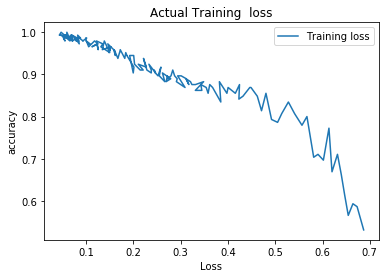

In [66]:
import matplotlib.pyplot as plt
loss = history_dict['loss']
accuracy = history_dict['accuracy']
plt.plot(loss,accuracy, label='Training loss')
plt.title('Actual Training  loss')
plt.xlabel('Loss')
plt.ylabel('accuracy')
plt.legend()

plt.show()

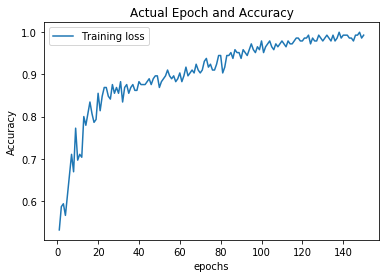

In [67]:
loss = history_dict['loss']
epochs = range(1, len(accuracy) + 1)
accuracy = history_dict['accuracy']
plt.plot(epochs,accuracy, label='Training loss')
plt.title('Actual Epoch and Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

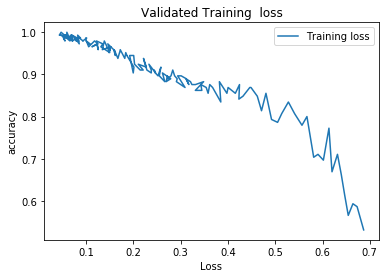

In [68]:
loss = history_dict_v['loss']
accuracy = history_dict_v['accuracy']
plt.plot(loss,accuracy, label='Training loss')
plt.title('Validated Training  loss')
plt.xlabel('Loss')
plt.ylabel('accuracy')
plt.legend()

plt.show()

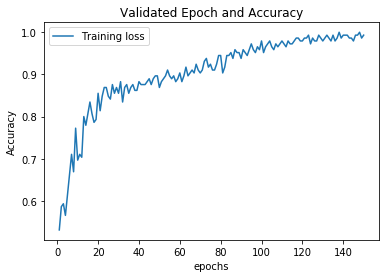

In [69]:
loss = history_dict_v['loss']
epochs = range(1, len(accuracy) + 1)
accuracy = history_dict_v['accuracy']
plt.plot(epochs,accuracy, label='Training loss')
plt.title('Validated Epoch and Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [70]:
results = model.evaluate(test_set_f, y_test)

57/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================